In [1]:
!pip install sklearn
!pip install  keras
!pip install  nltk
!pip install  pandas
!pip install  numpy
!pip install  re
!pip install  codecs

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement codecs (from versions: none)
ERROR: No matching distribution found for codecs


In [2]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [3]:
url = 'https://raw.githubusercontent.com/KoJl9lH-59rus/ML_KT/refs/heads/main/%D0%9A%D0%A21/content/Tweets.csv'

questions = pd.read_csv(url)

questions.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
questions.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [5]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.head()

,Unnamed: 0,textID,text,selected_text,sentiment
0,0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,2,088c60f138,my boss is bullying me...,bullying me,negative
3,3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [8]:
clean_questions.groupby("sentiment").count()

,Unnamed: 0,textID,text,selected_text
sentiment,,,,
negative,7781,7781,7781,7781
neutral,11118,11118,11117,11117
positive,8582,8582,8582,8582


Вцелом сбалансированный датасет.

In [ ]:
clean_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     27481 non-null  int64 
 1   textID         27481 non-null  object
 2   text           27480 non-null  object
 3   selected_text  27480 non-null  object
 4   sentiment      27481 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


Уберем значение с null

In [19]:
clean_questions = clean_questions.dropna(subset=['text'])
clean_questions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     27480 non-null  int64 
 1   textID         27480 non-null  object
 2   text           27480 non-null  object
 3   selected_text  27480 non-null  object
 4   sentiment      27480 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


Заменим категории sentiment на числа

In [20]:
clean_questions["sentiment"] = clean_questions["sentiment"].map({'negative': 0, 'neutral': 1, 'positive': 2}).fillna(0)
clean_questions.head()

,Unnamed: 0,textID,text,selected_text,sentiment
0,0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",1
1,1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,0
2,2,088c60f138,my boss is bullying me...,bullying me,0
3,3,9642c003ef,what interview! leave me alone,leave me alone,0
4,4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",0


Карта злодейских слов

Sooo SAD bullying me leave me alone Sons of ****, DANGERously lost Uh oh, I am sunburned *sigh* sick onna I`m sorry. .no internet Power back up not working too well so much for being unhappy for about 10 minute miss soooooo sleeeeepy!!! SUCKKKKKK dont like go d I`m not thrilled at all with mine. it is ****...u have dissappointed me that past few days hurts Torn ace of hearts i lost all my friends, i`m alone and sleepy.. I give in to easily jealous.. BADDD. I am sooo tired Sick. , sorry guys i miss you bby tired freaked unfortunately horrible, busy I don`t feel confident sad. Not looking forward Poor you not well painful. sad? missed all the awesome weather, terrible! Unfortunatley, That sucks, tho. Hate fighting Car-warmed Sprite tastes like sore throat hate i don`t like the other ones. Bugger. forgot I still have washing in my machine .really bad brutal boring messed NOT THE SECRET NAMEREBECCA PLEASE miss illness sad sick! oww WHAT ABOUT ME ??  I VOTE EVERY DAY FOR YOU !!!!! This diet

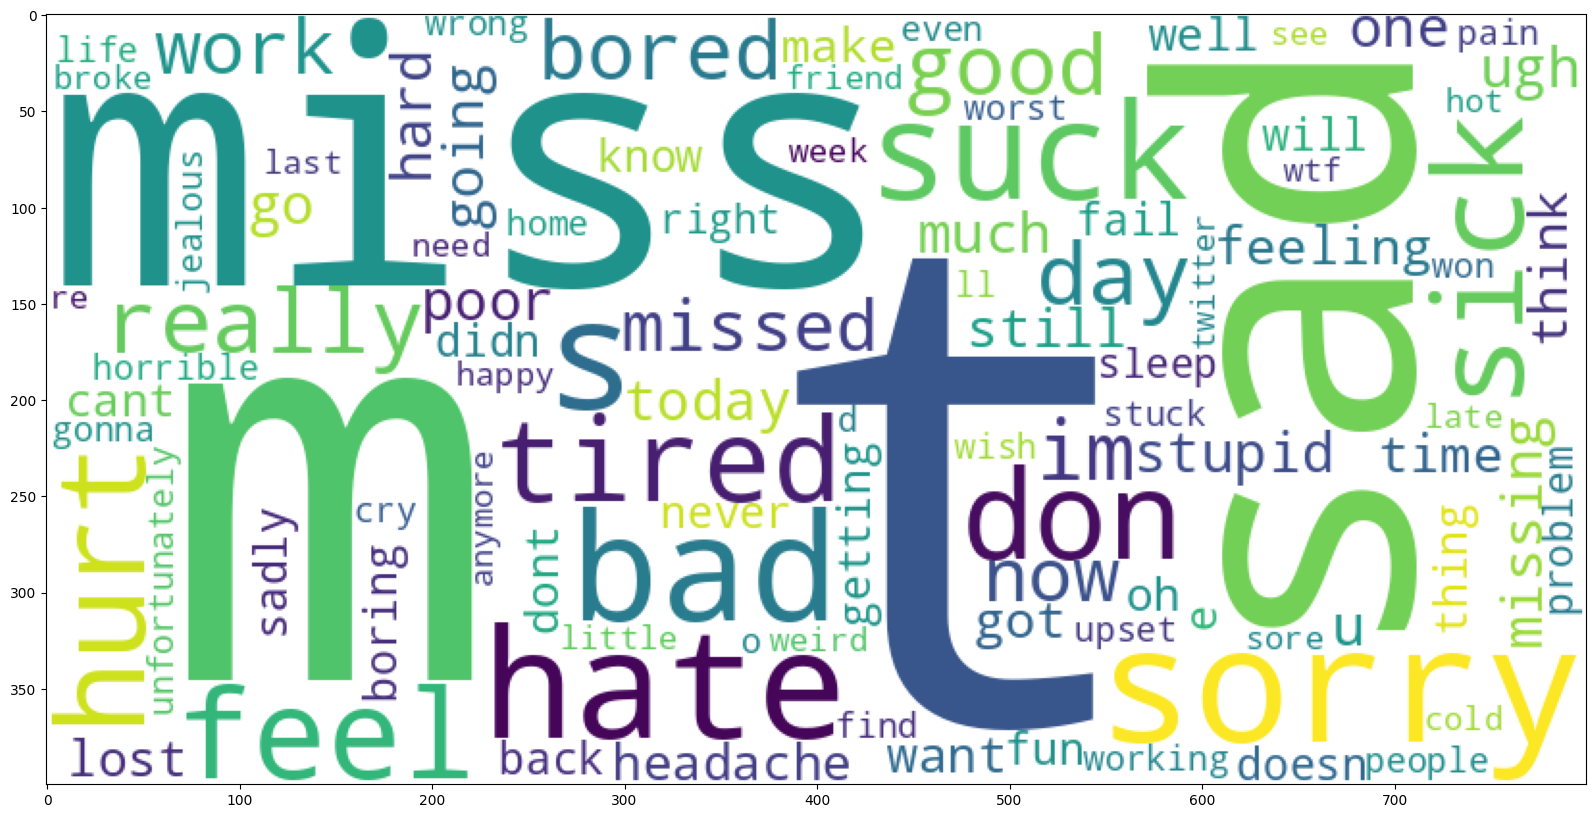

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

a = " ".join(clean_questions.loc[clean_questions["sentiment"] == 0, "selected_text"])
print(a)

en_cloud = WordCloud(max_words=100, background_color='white',
                     width=800, height=400,
                     collocations=False).generate(a)
fig = plt.figure(figsize=(20, 10))
plt.imshow(en_cloud);

# Шаг 3.

### Наши данные чисты, теперь их нужно подготовить

Теперь, когда наши входные данные стали более разумными, давайте преобразуем их так, чтобы наша модель могла их понять. Из этого следует:
- Токенизация предложений в список отдельных слов
- Создание тестового сплита трейна
- Еще немного проверяем наши данные, чтобы подтвердить результаты.

In [27]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["selected_text"].apply(tokenizer.tokenize)
clean_questions.head()

,Unnamed: 0,textID,text,selected_text,sentiment,tokens
0,0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",1,"[I, d, have, responded, if, I, were, going]"
1,1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,0,"[Sooo, SAD]"
2,2,088c60f138,my boss is bullying me...,bullying me,0,"[bullying, me]"
3,3,9642c003ef,what interview! leave me alone,leave me alone,0,"[leave, me, alone]"
4,4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",0,"[Sons, of]"
